0. Preparation (Setting the Random State)

In [43]:
import numpy as np
import scipy as sc
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn


rs = min(328964, 328830)
np.random.seed(rs) # you have to call in every cell where you use a function that requires a random state


1. Exercise 1 (Loading and Preparing the Data)

In [44]:
np.random.seed(rs)

df_tot = pd.read_csv("cla4lsp_customers.csv", sep='\t', parse_dates=['Dt_Customer'], date_format='%d-%m-%Y')
print(df_tot.info())
workdf = df_tot.sample(frac=2/3, random_state=rs)
print(df_tot.shape)
print(workdf.shape)
workdf.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
print(workdf.shape)
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
          'Response', 'Complain', 'Recency']
features = list(workdf.drop(labels, axis=1).columns)
print(labels)
print(features)
habits = features[7:16]
print(habits)
removed = np.random.choice(habits, 1)
print(removed)
workdf.drop(removed, axis=1, inplace=True)
features.remove(removed)
print(workdf.shape)
print(features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Cleaning the working dataset from missing values

In [45]:
# print(workdf[features].isna().sum())
print(workdf.shape)
workdf.dropna(axis=0, inplace=True) # cambiato rispetto a prima, droppo le righe con valori mancanti
print(workdf.shape)

(1493, 25)
(1478, 25)


2. Exercise 2 (Encoding of Categorical Data) \
Here we have four categorical features: Education, Marital_Status, Year_Birth and Dt_Customer; for the first two, since there are not too many possible values, we can use one-hot encoding by means of the pd.get_dummies() function, whereas for the last two, which have a lot of possible values, we use label encoding.

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# enc = OneHotEncoder()
# transformed = enc.fit_transform(workdf[['Education', 'Marital_Status']])
# print(transformed)
# ohe_df = pd.DataFrame(transformed, columns=[['Education', 'Marital_Status']])
# Xworkdf = pd.concat([workdf, ohe_df], axis=1).drop(['Education', 'Marital_Status'], axis=1)

# print(workdf[features].iloc[:5])
Xworkdf = pd.get_dummies(data=workdf[features], columns=['Education', 'Marital_Status'], drop_first=True)
new_cols = list(Xworkdf.columns[~Xworkdf.columns.isin(workdf.columns)])
print(new_cols)
years = Xworkdf['Year_Birth']
dates = Xworkdf['Dt_Customer']
le = LabelEncoder()
enc_years = le.fit_transform(years)
enc_dates = le.fit_transform(dates)
Xworkdf['Year_Birth'] = enc_years
Xworkdf['Dt_Customer'] = enc_dates
# print(Xworkdf.shape)
# print(Xworkdf.iloc[:5])



['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO']


 Exercise 3 (Preprocessing and full-PCA)

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
mm = MinMaxScaler()
# print(features)
# numerical_features = ['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
#                        'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
# categorical_features = ['Year_Birth', 'Dt_Customer']
# categorical_features.extend(new_cols)
# print(categorical_features)

var_original = Xworkdf.var()
std_features = std.fit_transform(Xworkdf.values)
Xworkdf_std = pd.DataFrame(std_features, index=Xworkdf.index, columns=Xworkdf.columns)
# print(Xworkdf_std.iloc[:5])
mm_features = mm.fit_transform(Xworkdf.values)
Xworkdf_mm = pd.DataFrame(mm_features, index=Xworkdf.index, columns=Xworkdf.columns)

var_std = Xworkdf_std.var()
change_std = ((var_std - var_original) / var_original) * 100
print("\nPercentage Change in Variance with StandardScaler:")
print(change_std)





Percentage Change in Variance with StandardScaler:
Year_Birth                   -99.271364
Income                      -100.000000
Kidhome                      250.957207
Teenhome                     235.088785
Dt_Customer                  -99.996700
MntWines                     -99.999146
MntFruits                    -99.935812
MntMeatProducts              -99.997964
MntFishProducts              -99.965114
MntGoldProds                 -99.963312
NumWebPurchases              -86.669732
NumCatalogPurchases          -88.409549
NumStorePurchases            -90.586112
NumWebVisitsMonth            -83.186309
Education_Basic             3792.453805
Education_Graduation         300.422330
Education_Master             602.641398
Education_PhD                466.927229
Marital_Status_Alone       49266.870056
Marital_Status_Divorced      977.560242
Marital_Status_Married       319.672597
Marital_Status_Single        499.071426
Marital_Status_Together      429.063977
Marital_Status_Widow        

In [48]:
var_mm = Xworkdf_mm.var()
change_mm = ((var_mm - var_original) / var_original) * 100
print("\nPercentage Change in Variance with MinMaxScaler:")
print(change_mm)


Percentage Change in Variance with MinMaxScaler:
Year_Birth                 -99.968112
Income                    -100.000000
Kidhome                    -75.000000
Teenhome                   -75.000000
Dt_Customer                -99.999719
MntWines                   -99.999955
MntFruits                  -99.997475
MntMeatProducts            -99.999966
MntFishProducts            -99.998498
MntGoldProds               -99.999030
NumWebPurchases            -99.840000
NumCatalogPurchases        -99.872449
NumStorePurchases          -99.408284
NumWebVisitsMonth          -99.750000
Education_Basic              0.000000
Education_Graduation         0.000000
Education_Master             0.000000
Education_PhD                0.000000
Marital_Status_Alone         0.000000
Marital_Status_Divorced      0.000000
Marital_Status_Married       0.000000
Marital_Status_Single        0.000000
Marital_Status_Together      0.000000
Marital_Status_Widow         0.000000
Marital_Status_YOLO          0.000000


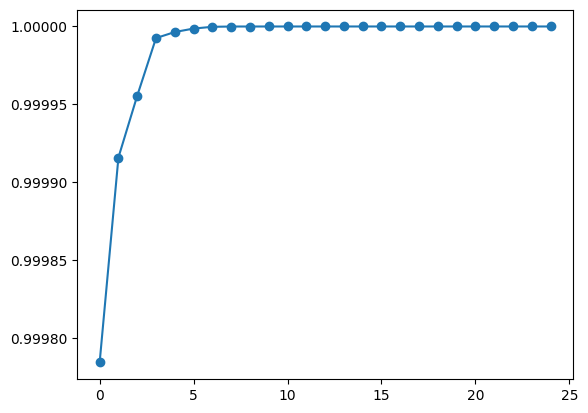

In [49]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(Xworkdf.values)
eigenvalues = pca.explained_variance_
explained_variances = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(explained_variances)
plt.plot(explained_variance_ratio, marker='o')
#plt.plot(explained_variances, marker='o')
plt.show()


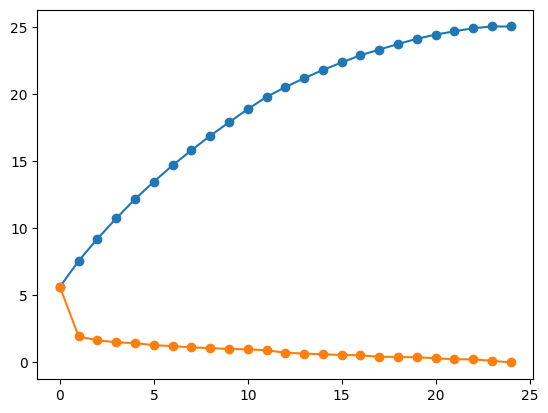

In [50]:
pca_std=PCA()
pca_std.fit_transform(Xworkdf_std.values)
eigenvalues = pca_std.explained_variance_
explained_variances = pca_std.explained_variance_
plt.plot(np.cumsum(eigenvalues), marker='o') #cum
plt.plot(explained_variances, marker='o') #individual

plt.show()

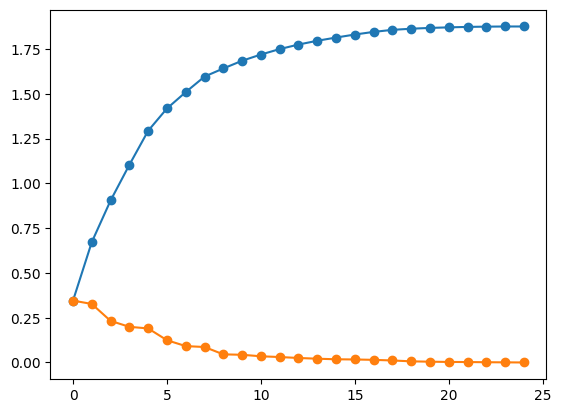

In [51]:
pca_mm=PCA()
pca_mm.fit_transform(Xworkdf_mm.values)
eigenvalues = pca_mm.explained_variance_
explained_variances = pca_mm.explained_variance_
plt.plot(np.cumsum(eigenvalues), marker='o') #cum
plt.plot(explained_variances, marker='o') #individual

plt.show()

Exercise 4 (Dimensionality Reduction and Interpretation of the PCs): Apply the PCA to both2 Xworkdf std and Xworkdf mm, selecting m PCs such that m = min(m',5) where m' is the minimum number of PCs that explains 33% of the total variance. Plot the barplots of percentage of explained variance, with respect to the PCs.

In [52]:
m_one_std = np.sum(np.cumsum(pca_std.explained_variance_ratio_) < .33) + 1
m_one_mm = np.sum(np.cumsum(pca_mm.explained_variance_ratio_) < .33) + 1
m_std = min(m_one_std, 5)
m_mm = min(m_one_mm, 5)

pca_std=PCA(n_components = m_std)
df_pca_std = pca_std.fit_transform(Xworkdf_std.values) # non è un df ma un array, conviene cambiare nome per non confonderci
pca_mm = PCA(n_components = m_mm)
df_pca_mm = pca_mm.fit_transform(Xworkdf_mm.values)

Feature Contribution Plot

c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


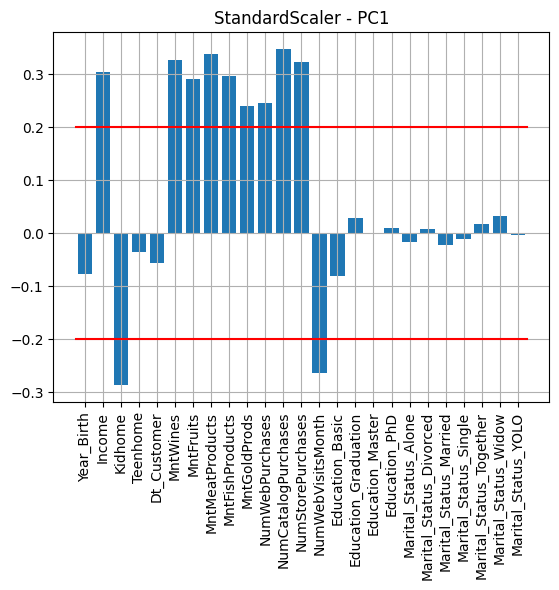

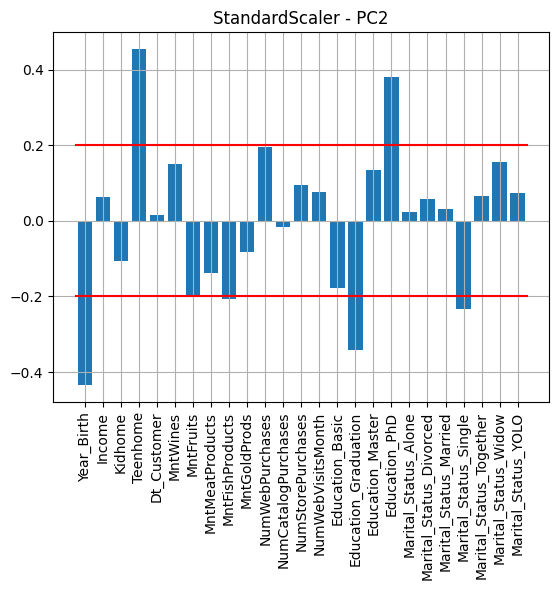

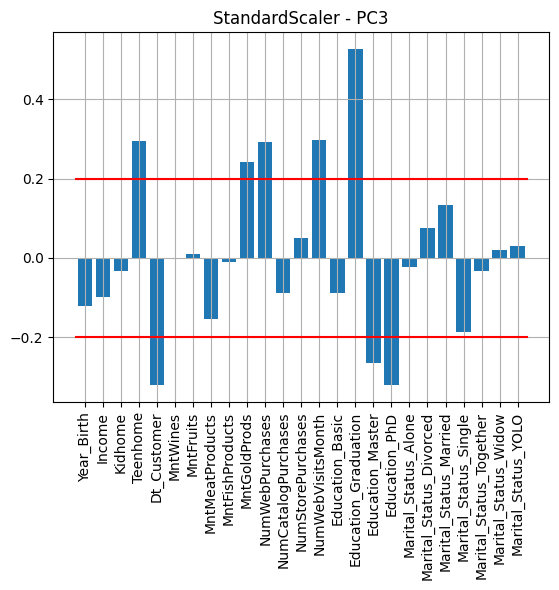

In [53]:
eps_std = np.sqrt(1/pca_std.n_features_)

#StandardScaler
for i in range(m_std):
    plt.figure()
    plt.bar(np.arange(pca_std.n_features_in_), pca_std.components_[i, :])
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [eps_std, eps_std], 'red')
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [-eps_std, -eps_std], 'red')
    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), 
            labels=Xworkdf_std.columns.to_list(),
            rotation='vertical')
    plt.title('StandardScaler - PC'+ str(i+1) )
    plt.grid()
plt.show()

PC1: People with higher income and more purchases(+) vs People with kids and who visit the website(-) (non so come chiamarlo) \
PC2: Older single graduates(-) vs PhD graduates with teenagers at home(+) \
PC3: People who are long time customers and have masters or PhD(-) vs Graduated people with kids and buy gold online (+)

Non so come sintetizzare questi nomi lol

In [65]:
pc_std_names = ['income(+) vs kids(-)', 
           'graduates(-) vs teenagers (+)',  
           'PhD(-) vs gold(+)'  
           ]

c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


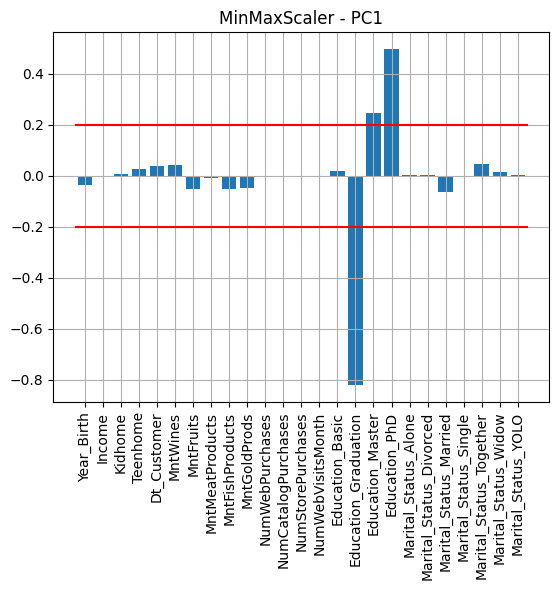

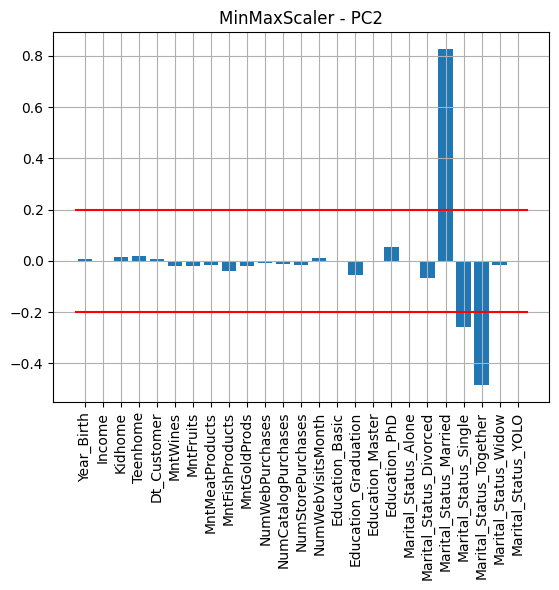

In [55]:
eps_mm = np.sqrt(1/pca_mm.n_features_)
#MinMaxScaler
for i in range(m_mm):
    plt.figure()
    plt.bar(np.arange(pca_mm.n_features_in_), pca_mm.components_[i, :])
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [eps_mm, eps_mm], 'red')
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [-eps_mm, -eps_mm], 'red')
    plt.xticks(ticks=np.arange(pca_mm.n_features_in_), 
            labels=Xworkdf_mm.columns.to_list(),
            rotation='vertical')
    plt.title('MinMaxScaler - PC'+ str(i+1) )
    plt.grid()
plt.show()

Comment, name PCs (in base al contributo delle singole feature assegnare i nomi) Tipo per MM pensavo a Pc1 = LvEducazione e Pc2 = StatoConiugale \
PC1: Master or PhD (+) vs Graduated (-) \
PC2: Married People(+) vs Single or together(-)

In [70]:
pc_mm_names = ['Master or PhD (+) vs Graduated (-)', 
           'Married People(+) vs Single or together(-)'
           ]

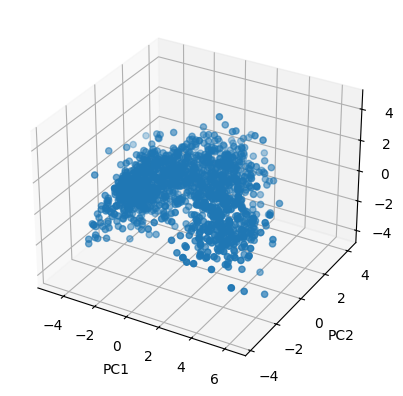

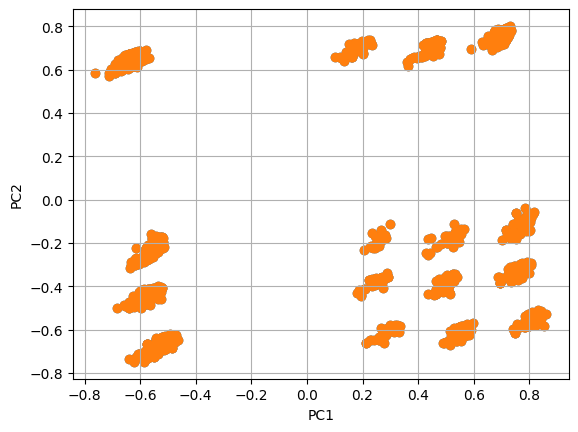

In [56]:
#std
from mpl_toolkits.mplot3d import Axes3D
ff= plt.figure()
ax = ff.add_subplot(111, projection ='3d' )
ax.scatter(df_pca_std[:,0], df_pca_std[:,1], df_pca_std[:,2] )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()
#min max
plt.figure()
plt.scatter(df_pca_mm[:,0], df_pca_mm[:,1])
plt.scatter(df_pca_mm[:,0], df_pca_mm[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

c:\Users\robyg\OneDrive\Desktop\data science\computational linear algebra\labs\homeworks\pca\.venv\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


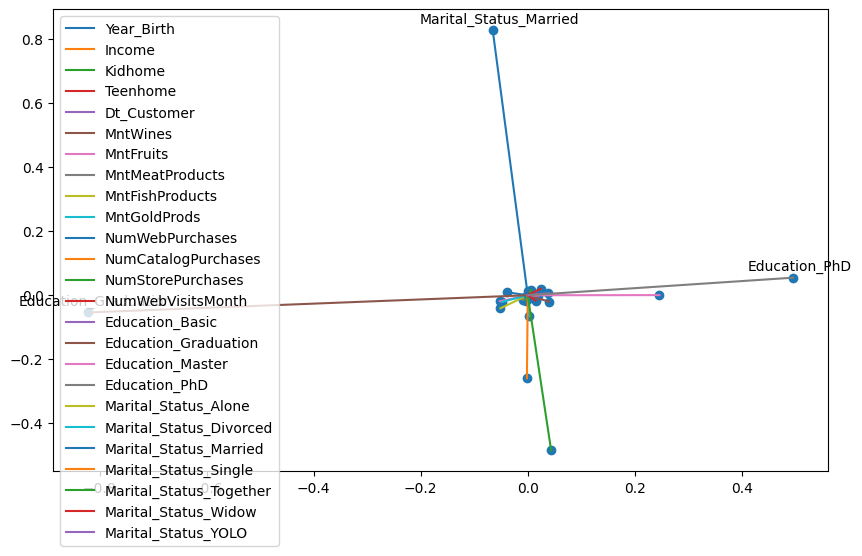

In [57]:
#bho abbastanza inutile
plt.figure(figsize=(10, 6))
for i in range (pca_mm.n_features_):
    plt.plot([0 , pca_mm.components_[0,i]], [0 , pca_mm.components_[1,i]],
             label = Xworkdf_mm.columns[i])
plt.scatter(pca_mm.components_[0,:], pca_mm.components_[1,:])
distances = np.sqrt(pca_mm.components_[0, :]**2 + pca_mm.components_[1, :]**2)
top3_indices = np.argsort(distances)[-3:]

for i in top3_indices:
    plt.annotate(Xworkdf_mm.columns[i],
                 (pca_mm.components_[0, i], pca_mm.components_[1, i]),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='center')
plt.legend(loc='upper left')

Exercise 5 (k-Means)

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(rs)
sil_coeff_max=0
k_max_std=3
for n_cluster in range(3, 11):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=rs).fit(df_pca_std)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_pca_std, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    if(sil_coeff > sil_coeff_max) : 
        sil_coeff_max = sil_coeff
        k_max_std = n_cluster 
    # n_clusters=3 is the best value for df_pca_std
print("Best k for Silhouette Coefficent for std is " + str(k_max_std))
sil_coeff_max=0
k_max_mm=3
for n_cluster in range(3, 11):
    kmeans = KMeans(n_clusters=n_cluster, n_init=10, random_state=rs).fit(df_pca_mm)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df_pca_mm, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    if(sil_coeff > sil_coeff_max) : 
        sil_coeff_max = sil_coeff
        k_max_mm = n_cluster 
    # n_clusters=4 is the best value for df_pca_std
print("Best k for Silhouette Coefficent for mm is " +str(k_max_mm))


Best k for Silhouette Coefficent for std is 3
Best k for Silhouette Coefficent for mm is 4


In [59]:
km_std = KMeans(n_clusters=3, n_init=10, random_state=rs)
km_mm = KMeans(n_clusters=4, n_init=10, random_state=rs)

km_std.fit_transform(df_pca_std)
km_mm.fit_transform(df_pca_mm)

array([[1.0775963 , 0.07702564, 1.08870331, 1.5312185 ],
       [0.23153426, 1.22472438, 1.81401086, 1.3622578 ],
       [0.84903738, 0.35545291, 1.34807819, 1.55535034],
       ...,
       [1.11762898, 1.58962426, 1.13140136, 0.02162055],
       [0.20235531, 1.19249999, 1.50311317, 0.94101747],
       [1.39850479, 0.38251398, 0.85608066, 1.59459156]])

Exercise 6 (Clusters and Centroid Interpretation and Visualization): Comment the centroids of the best clustering for both the DFs. In particular, give to each centroid a name or a meaningful brief description that characterizes the average customer in the cluster represented by the centroid. Moreover, plot the score graph of exercise 4 together with the centroids. In particular, show the different clusters using different colors and/or markers for the dots.

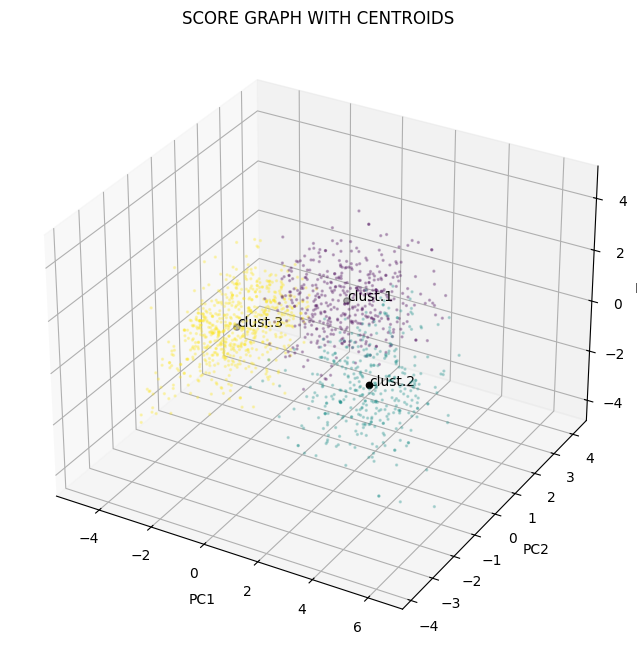

In [60]:
sg_3d_km = plt.figure(figsize=(8, 8))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
labels = km_std.labels_
ax_sg_3d_km.scatter(df_pca_std[:,0], df_pca_std[:,1], df_pca_std[:,2] , c=labels, s=2, alpha=0.25)
ax_sg_3d_km.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black')
for kk in range(k_max_std):
    ax_sg_3d_km.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], km_std.cluster_centers_[kk, 2], f'clust.{kk+1}')
plt.title('SCORE GRAPH WITH CENTROIDS')
ax_sg_3d_km.set_xlabel("PC1")
ax_sg_3d_km.set_ylabel("PC2")
ax_sg_3d_km.set_zlabel("PC3")
plt.grid()
plt.show()

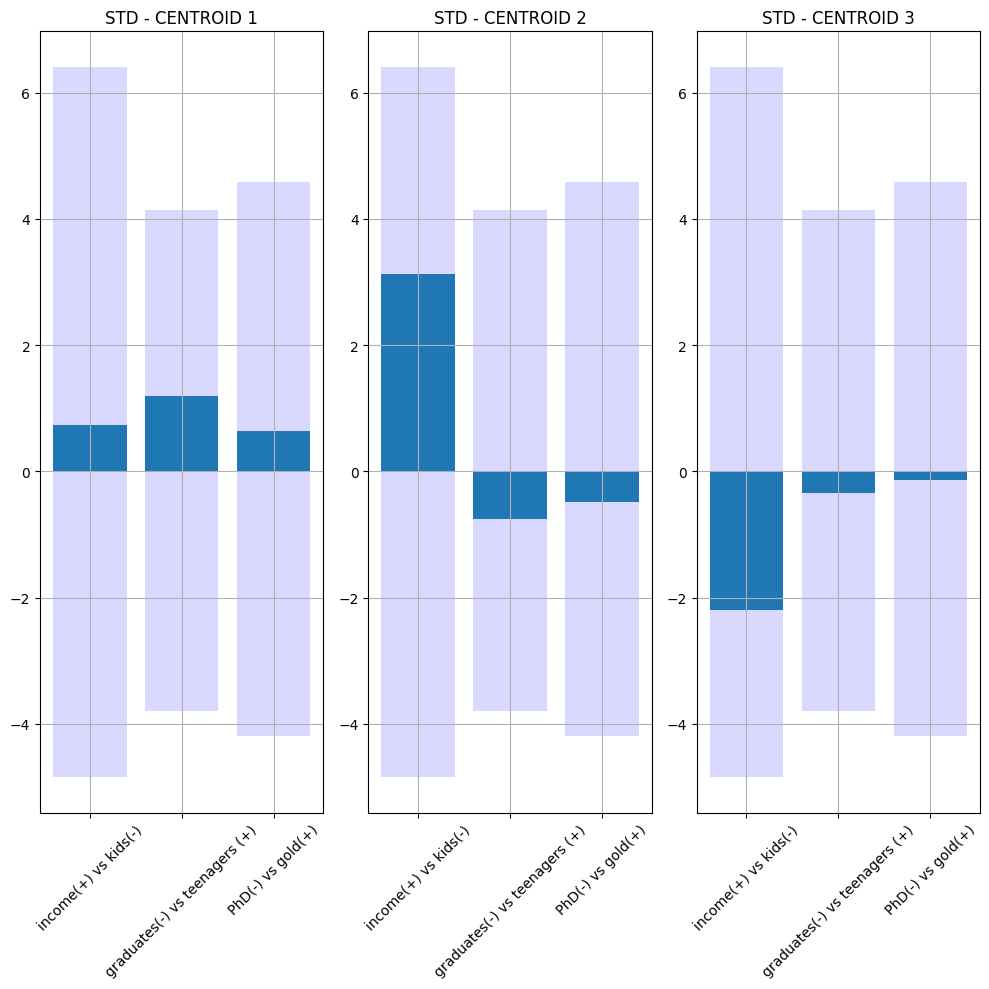

In [69]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = df_pca_std.max(axis=0)  
mins_y = df_pca_std.min(axis=0)   

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(1, 3, figsize=(10, 10))
for ii in range(k_max_std):
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])  
    ax_centroids[ii].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))  
    ax_centroids[ii].set_xticklabels(labels=pc_std_names, rotation=45)  
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'STD - CENTROID {ii+1}')

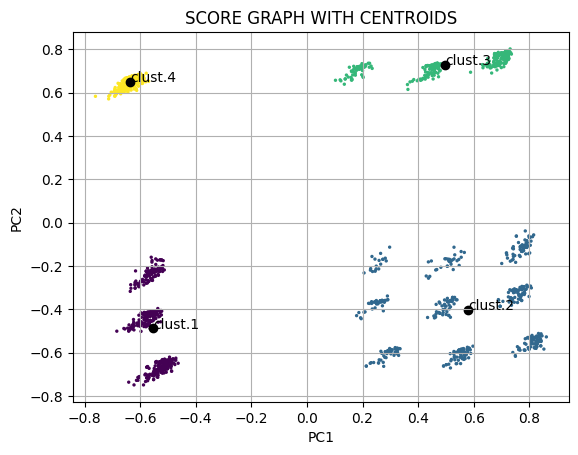

In [62]:
labels = km_mm.labels_
plt.scatter(df_pca_mm[:,0], df_pca_mm[:,1], c=labels, s=2)
plt.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black')
for kk in range(k_max_mm):
    plt.text(km_mm.cluster_centers_[kk, 0], km_mm.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('SCORE GRAPH WITH CENTROIDS')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

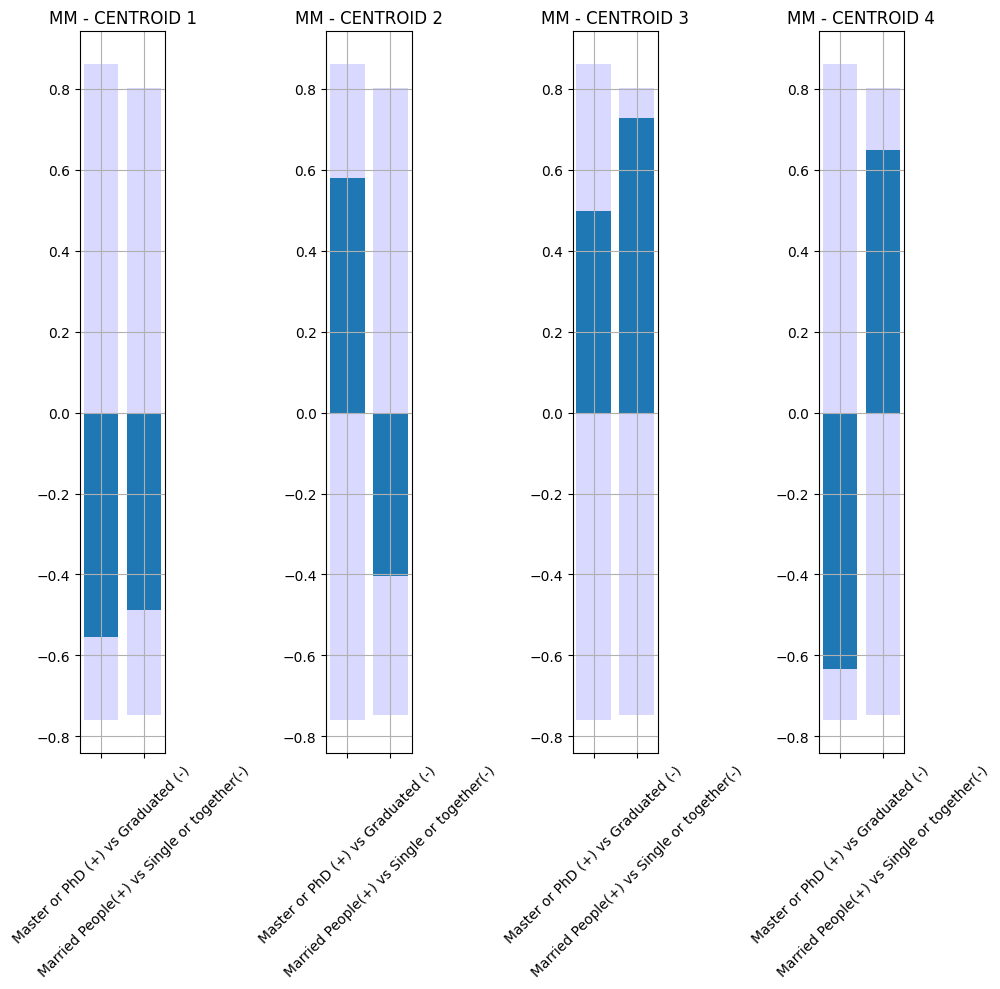

In [71]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = df_pca_mm.max(axis=0)  
mins_y = df_pca_mm.min(axis=0)   

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(1, 4, figsize=(10, 10))
for ii in range(k_max_mm):
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :])  
    ax_centroids[ii].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))  
    ax_centroids[ii].set_xticklabels(labels=pc_mm_names, rotation=45)  
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'MM - CENTROID {ii+1}')

Comment

Exercise 7 - Clusters and Centroids Evaluation: For both the DFs, perform an internal
and an external evaluation of the clusterings obtained.

Internal evaluation

In [63]:
from sklearn.metrics import silhouette_score, silhouette_samples
silcoeff_list = []
cluster_names = ["name1", "name2", "name3"]
silcoeff_list.append(silhouette_score(df_pca_std, km_std.labels_))
silscores = silhouette_samples(df_pca_std, km_std.labels_)
cluster_silscores = [np.mean(silscores[km_std.labels_ == kk]) for kk in range(k_max_std)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list)]), index=cluster_names + ['Global'], columns=['Sil.Score-STD']))
cluster_names = ["name1", "name2", "name3","name4"]
silcoeff_list.append(silhouette_score(df_pca_mm, km_mm.labels_))
silscores = silhouette_samples(df_pca_mm, km_mm.labels_)
cluster_silscores = [np.mean(silscores[km_mm.labels_ == kk]) for kk in range(k_max_mm)]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list)]), index=cluster_names + ['Global'], columns=['Sil.Score-STD']))

,Sil.Score-STD
name1,0.248251
name2,0.331155
name3,0.431445
Global,0.353142


,Sil.Score-STD
name1,0.801941
name2,0.659147
name3,0.770325
name4,0.959816
Global,0.780752
